In [26]:
import pandas as pd
import numpy as np
import time
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, precision_score, recall_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Datasets/Yelp Dataset Reduced.csv")

In [4]:
# DICTIONARY WITH NAME AND COMMAND TO INSTANTIATE DIFFERENT MODELS
classifiers = {}
classifiers.update({"XGBClassifier": XGBClassifier(eval_metric='logloss',
                                                   objective='binary:logistic',
                                                   use_label_encoder=False
                                                   )})
classifiers.update({"CatBoostClassifier": CatBoostClassifier(silent=True)})
classifiers.update({"LinearSVC": LinearSVC(max_iter=10000)})
#classifiers.update({"MultinomialNB": MultinomialNB()})
classifiers.update({"LGBMClassifier": LGBMClassifier()})
classifiers.update({"RandomForestClassifier": RandomForestClassifier()})
classifiers.update({"DecisionTreeClassifier": DecisionTreeClassifier()})
classifiers.update({"ExtraTreeClassifier": ExtraTreeClassifier()})
classifiers.update({"AdaBoostClassifier": AdaBoostClassifier()})
classifiers.update({"KNeighborsClassifier": KNeighborsClassifier()})
classifiers.update({"RidgeClassifier": RidgeClassifier()})
classifiers.update({"SGDClassifier": SGDClassifier()})
classifiers.update({"BaggingClassifier": BaggingClassifier()})
classifiers.update({"BernoulliNB": BernoulliNB()})
classifiers.update({"LogisticRegression": LogisticRegression()})
classifiers.update({"SVM": SVC()})

/Users/kpandey/anaconda3/lib/python3.10/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [19]:
df['TIMESTAMP_DIFFERENCE'] = pd.to_numeric(df['TIMESTAMP_DIFFERENCE'], downcast='integer', errors='coerce')


In [21]:
le = LabelEncoder()
Y = le.fit_transform(Y)

In [24]:
X.isnull().sum()

RATING                             0
AVERAGE_RATING                     0
RATING_DEVIATION                   0
TOTAL_PRODUCT_REVIEWS              0
REVIEW_LENGTH                      0
RATING_CATEGORY                    0
SINGLE_RATING_CATEGORY             0
REVIEW_COUNT_DATE                  0
SAME_DATE_MULTIPLE_REVIEWS         0
MAX_USER_REVIEWS_DAY               0
TIMESTAMP_DIFFERENCE           20000
AVERAGE_USER_REVIEW_LENGTH         0
TOTAL_USER_REVIEWS                 0
PERCENTAGE_POSITIVE_REVIEWS        0
dtype: int64

In [22]:
# PERFORM THE TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# FEATURE SCALINGf
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/Users/kpandey/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/kpandey/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [23]:
df_models = pd.DataFrame(
    columns=['model', 'run_time', 'accuracy', 'precision', 'f1_score'])

for key in classifiers:
    # STARTING TIME
    start_time = time.time()
    # CURRENT CLASSIFIER
    clf = classifiers[key]
    #TRAIN CLASSIFIER ON TRAINING DATA
    clf.fit(X_train_scaled, y_train)
    # MAKE PREDICTIONS USING CURRENT CLASSIFIER
    predictions = clf.predict(X_test_scaled)
    # CALCULATE ACCURACY
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    f1score = f1_score(y_test, predictions)
    
    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60, 2)),
           'accuracy': accuracy,
           'precision': precision,
           'f1_score': f1score
           }

    df_models = df_models._append(row, ignore_index=True)

df_models = df_models.sort_values(by='accuracy', ascending=False)

ValueError: Input X contains NaN.
LinearSVC does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [11]:
df_models

,model,run_time,accuracy,precision,f1_score
2,LinearSVC,0.0,0.89700,0.897000,0.945704
3,LGBMClassifier,0.0,0.89700,0.901213,0.945402
9,RidgeClassifier,0.0,0.89700,0.897000,0.945704
10,SGDClassifier,0.0,0.89700,0.897000,0.945704
13,LogisticRegression,0.0,0.89700,0.897000,0.945704
14,SVM,0.1,0.89700,0.897000,0.945704
1,CatBoostClassifier,0.05,0.89600,0.900910,0.944857
7,AdaBoostClassifier,0.01,0.89425,0.899520,0.943966
0,XGBClassifier,0.01,0.89225,0.904225,0.942480
4,RandomForestClassifier,0.03,0.89025,0.901761,0.941521


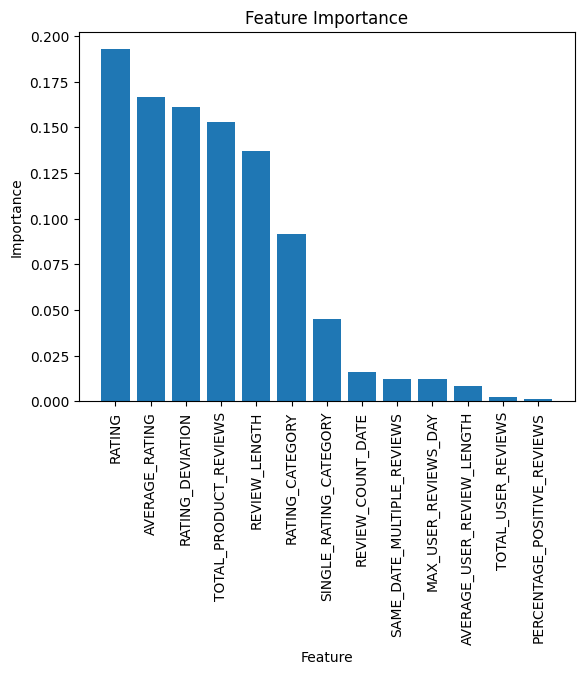

In [17]:
#PLOT PREDICTION POWER


# Assuming you have a feature matrix X and target vector y
model = RandomForestRegressor()
model.fit(X, Y)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
column_names = ['RATING',
       'AVERAGE_RATING', 'RATING_DEVIATION', 'TOTAL_PRODUCT_REVIEWS',
       'REVIEW_LENGTH', 'RATING_CATEGORY', 'SINGLE_RATING_CATEGORY',
       'REVIEW_COUNT_DATE', 'SAME_DATE_MULTIPLE_REVIEWS',
       'MAX_USER_REVIEWS_DAY',
       'AVERAGE_USER_REVIEW_LENGTH', 'TOTAL_USER_REVIEWS',
       'PERCENTAGE_POSITIVE_REVIEWS']  # Replace with your actual column names

plt.figure()
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), column_names, rotation='vertical')  # Set column names as x-axis labels
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()


In [30]:
n_clusters = 2

# CREATE AND FIT THE K-MEANS MODEL
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# # GET THE CLUSTER LABELS
cluster_labels = kmeans.labels_
df['cluster_label'] = cluster_labels

/Users/kpandey/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
X = X.drop("TIMESTAMP_DIFFERENCE", axis = 1)

In [31]:
df[['LABEL', 'cluster_label']]

,LABEL,cluster_label
0,-1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
19995,1,0
19996,1,0
19997,-1,0
19998,1,0


In [32]:
counts = df.groupby(['cluster_label', 'LABEL']).size().reset_index(name='count')

# Filter the counts for LABEL = -1
label_minus1_counts = counts[counts['LABEL'] == -1]

# Filter the counts for LABEL = 1
label_1_counts = counts[counts['LABEL'] == 1]

In [33]:
label_1_counts

,cluster_label,LABEL,count
1,0,1,16814
3,1,1,1112


In [34]:
label_minus1_counts

,cluster_label,LABEL,count
0,0,-1,1924
2,1,-1,150
